# Perceptron algorithm

In [108]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 7)

In [110]:
def stepFunction(t):
    """
    Classification function
    """
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    """
    Get y_hat for a single point with X coordinates
    """
    return stepFunction((np.matmul(X,W)+b)[0])

The perceptron step works as follows. For a point with coordinates (p,q)(p,q), label yy, and prediction given by the equation $\hat{y} = step(w_1x_1 + w_2x_2 + b)$

If the point is correctly classified, do nothing.

If the point is classified positive, but it has a negative label, subtract $\alpha p$, $\alpha q$, and $\alpha$ from $w_1$, $w_2$, and $b$ respectively.

If the point is classified negative, but it has a positive label, add $\alpha p$, $\alpha q$, and $\alpha$ to $w_1$, $w_2$, and $b$ respectively.

The equation of the line split both regions is:

$$
x_2 = -\frac{w_1}{w_2}x_1 - \frac{b}{w_2}
$$

In [111]:
# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Loop on points
    for i, x in enumerate(X):
        y_hat = prediction(x, W, b)
        if y_hat == y[i]:
            # Good prediction
            pass
        elif (y_hat == 1) and (y[i] == 0):
            # False positive
            # Decrease the weight by learning_rate * point coordinates
            # Decrease bias by learning rate
            W[0] -= learn_rate * x[0]
            W[1] -= learn_rate * x[1]
            b -= learn_rate
        else:
            # False negative
            # Increase the weight by learning_rate * point coordinates
            # Increase bias by learning rate
            W[0] += learn_rate * x[0]
            W[1] += learn_rate * x[1]
            b += learn_rate
    # Fill in code
    return W, b

In [112]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        # We save the line coefficients (slope and intercept)
        # x2 = slope * x1 + intercept
        # slope = -W[0]/W[1]
        # intercept = -b/W[1]
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [113]:
data = """0.78051,-0.063669,1
0.28774,0.29139,1
0.40714,0.17878,1
0.2923,0.4217,1
0.50922,0.35256,1
0.27785,0.10802,1
0.27527,0.33223,1
0.43999,0.31245,1
0.33557,0.42984,1
0.23448,0.24986,1
0.0084492,0.13658,1
0.12419,0.33595,1
0.25644,0.42624,1
0.4591,0.40426,1
0.44547,0.45117,1
0.42218,0.20118,1
0.49563,0.21445,1
0.30848,0.24306,1
0.39707,0.44438,1
0.32945,0.39217,1
0.40739,0.40271,1
0.3106,0.50702,1
0.49638,0.45384,1
0.10073,0.32053,1
0.69907,0.37307,1
0.29767,0.69648,1
0.15099,0.57341,1
0.16427,0.27759,1
0.33259,0.055964,1
0.53741,0.28637,1
0.19503,0.36879,1
0.40278,0.035148,1
0.21296,0.55169,1
0.48447,0.56991,1
0.25476,0.34596,1
0.21726,0.28641,1
0.67078,0.46538,1
0.3815,0.4622,1
0.53838,0.32774,1
0.4849,0.26071,1
0.37095,0.38809,1
0.54527,0.63911,1
0.32149,0.12007,1
0.42216,0.61666,1
0.10194,0.060408,1
0.15254,0.2168,1
0.45558,0.43769,1
0.28488,0.52142,1
0.27633,0.21264,1
0.39748,0.31902,1
0.5533,1,0
0.44274,0.59205,0
0.85176,0.6612,0
0.60436,0.86605,0
0.68243,0.48301,0
1,0.76815,0
0.72989,0.8107,0
0.67377,0.77975,0
0.78761,0.58177,0
0.71442,0.7668,0
0.49379,0.54226,0
0.78974,0.74233,0
0.67905,0.60921,0
0.6642,0.72519,0
0.79396,0.56789,0
0.70758,0.76022,0
0.59421,0.61857,0
0.49364,0.56224,0
0.77707,0.35025,0
0.79785,0.76921,0
0.70876,0.96764,0
0.69176,0.60865,0
0.66408,0.92075,0
0.65973,0.66666,0
0.64574,0.56845,0
0.89639,0.7085,0
0.85476,0.63167,0
0.62091,0.80424,0
0.79057,0.56108,0
0.58935,0.71582,0
0.56846,0.7406,0
0.65912,0.71548,0
0.70938,0.74041,0
0.59154,0.62927,0
0.45829,0.4641,0
0.79982,0.74847,0
0.60974,0.54757,0
0.68127,0.86985,0
0.76694,0.64736,0
0.69048,0.83058,0
0.68122,0.96541,0
0.73229,0.64245,0
0.76145,0.60138,0
0.58985,0.86955,0
0.73145,0.74516,0
0.77029,0.7014,0
0.73156,0.71782,0
0.44556,0.57991,0
0.85275,0.85987,0
0.51912,0.62359,0
"""

In [114]:
import io
array = np.genfromtxt(io.StringIO(data), delimiter=",")
X = array[:, [0, 1]]
y = array[:, 2]

In [117]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)
# Train the model
boundary_lines = trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25)

(-0.5, 1.5)

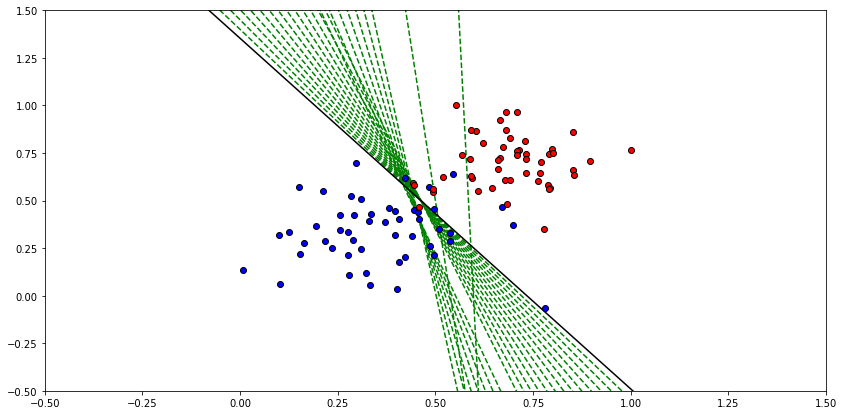

In [118]:
for i, boundary_line in enumerate(boundary_lines):
    x = np.linspace(-0.5, 1.5, 11)
    a = boundary_line[0][0]
    b = boundary_line[1][0]
    if i == len(boundary_lines) - 1:
        plt.plot(x, a*x+b, color='k', ls="-")
    else:
        plt.plot(x, a*x+b, color='g', ls="--")
plt.scatter(X[y==1, 0], X[y==1, 1], c='b', edgecolor='k', zorder=10)
plt.scatter(X[y==0, 0], X[y==0, 1], c='r', edgecolor='k', zorder=10)
plt.xlim((-0.5, 1.5))
plt.ylim((-0.5, 1.5))